# EEP 118 - Problem Set 1 - Problem 1

Measuring greenhouse gas emissions and understanding how economic activity affects these levels can be a
difficult task. For example, greenhouse gases vary in the amount of time they remain in the atmosphere and
how much energy they absorb. To address this issue, total greenhouse gas emissions are often measured in
units of Global Warming Potential (GWP). GWP is also known as $CO_2$ equivalents; $CO_2$ is given a GWP of 1
and all values less than/greater than 1 convey how many times less/more global warming potential the gas has
relative to $CO_2$. For example, while methane ($CH_4$) has a shorter lifespan than $CO_2$ it absorbs much more
energy, so it is considerably more harmful and is given a GWP of 28-36. In this problem set we will explore
how two measures of economic activity, GDP per capita and renewable energy consumption, are correlated
with greenhouse gas emissions.

The data comes from the World Bank’s Development Indicators for 2012, which are provided for you. Here
we focus on three variables. First is total greenhouse gas emissions, which include $CO_2$, all anthropogenic
sources of methane ($CH_4$), nitrous oxide ($N_2O$) and F-gases. The total emissions per capita in a given country
are calculated as metric tons of $CO_2$ equivalents divided by the midyear population. Next is GDP per capita,
calculated as gross domestic product divided by midyear population and measured in thousands of US dollars.
Lastly, renewable energy consumption is the share of renewables in total final energy consumption. The figures
below plot data from all 123 countries contained in the original dataset (the provided dataset is a subset of this original data). The values for selected countries can be found in Tables 1, 2, and 3.

<img src="images/figure-1.png" width="400" />

<img src="images/figure-2.png" width="400" />

In the cell below, we load the dependencies.

In [8]:
library(ggplot2, verbose=FALSE, warn.conflicts=FALSE, quietly=TRUE)
restore = list(repr.plot.width=6, repr.plot.height=4)
options(restore)

**Relationship between GDP per capita and greenhouse gas emissions per capita**

Looking at the first graph, there appears to be an association between GDP per capita and greenhouse gas emissions per capita. We will establish a simple linear relationship on a (very small) subset of 5 countries. The data are defined below.

In [4]:
country.data = data.frame(
    CountryName    = c("Brazil", "Cambodia", "Canada", "China", "United States"),
    GDPCapita      = c(11.56, 0.87, 48.72, 5.28, 49.48),
    GGTonnesCapita = c(14.77, 8.59, 29.55, 9.22, 20.20)
)
country.data

CountryName,GDPCapita,GGTonnesCapita
Brazil,11.56,14.77
Cambodia,0.87,8.59
Canada,48.72,29.55
China,5.28,9.22
United States,49.48,20.20


**Part (a):** Use `ggplot` to crate a scatter plot of these observations. Don't forget to (1) label the axes and their units, and (2) title your graph.

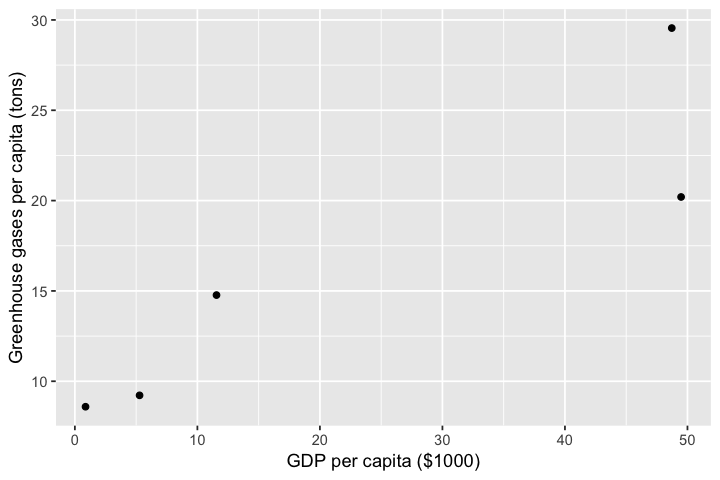

In [22]:
ggplot(country.data) +
geom_point(aes(x=GDPCapita, y=GGTonnesCapita)) +
xlab("GDP per capita ($1000)") + ylab("Greenhouse gases per capita (tons)")

**Part (b):** This question has **two parts**:

1. Estimate the linear relationship between GDP per capita and greenhouse gas emissions per capita (E) by OLS, showing all intermediate calculations as we saw in the lecture 3 slides.
2. Interpret the value of the estimated parameters $\hat{\beta}_0$ and $\hat{\beta}_1$.

$$\hat{E}_i = \hat{\beta}_0 + \hat{\beta}_1 \text{GDP/cap}_i + \epsilon_i , \; i = \{ \text{Brazil, Cambodia, Canada, China, US}\}$$

In [11]:
model = lm(GGTonnesCapita ~ GDPCapita, data = country.data)
summary(model)


Call:
lm(formula = GGTonnesCapita ~ GDPCapita, data = country.data)

Residuals:
      1       2       3       4       5 
 2.1364 -0.5185  4.6628 -1.3428 -4.9379 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   8.8216     2.7625   3.193   0.0496 *
GDPCapita     0.3297     0.0875   3.769   0.0327 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.194 on 3 degrees of freedom
Multiple R-squared:  0.8256,	Adjusted R-squared:  0.7675 
F-statistic:  14.2 on 1 and 3 DF,  p-value: 0.03269


In [12]:
# not sure how to answer (2)

**Part (c):** In your table, compute the fitted value and the residual for each observation, and verify that the residuals (approximately) sum to 0.

In [25]:
country.data$FittedValues = predict(model)
country.data$Residuals    = country.data$GGTonnesCapita - country.data$FittedValues
country.data

CountryName,GDPCapita,GGTonnesCapita,FittedValues,Residuals
Brazil,11.56,14.77,12.633604,2.1363957
Cambodia,0.87,8.59,9.108539,-0.5185389
Canada,48.72,29.55,24.887246,4.6627540
China,5.28,9.22,10.562752,-1.3427521
United States,49.48,20.20,25.137859,-4.9378587


In [21]:
sum(country.data$Residuals)     # should be close to 0

[1] -5.329071e-15

**Part (d):** According to the estimated relation, what is the predicted $\hat{E}$ for a country with a GDP per capita of \\$10,000?

In [35]:
predict(model, data.frame(GDPCapita=c(10)))

1 
12.11919

**Part (e):** How much of the variation in greenhouse gas emissions per capita for these 5 countries is explained by their GDP per capita? Can you provide some reasons for why emissions might be lower in less developed countries?

In [36]:
# coding answer

_Write your answer here, replacing this text._

**Part (f):** Repeat (b) for two additional sets of countries below.

In [37]:
country.data.2 = data.frame(
    CountryName    = c("Chile", "Georgia", "Indonesia", "Malta", "Philippines"),
    GDPCapita      = c(13.96, 3.47, 3.43, 19.95, 2.30),
    GGTonnesCapita = c(6.94, 3.82, 3.15, 4.58, 1.74)
)
country.data.2

CountryName,GDPCapita,GGTonnesCapita
Chile,13.96,6.94
Georgia,3.47,3.82
Indonesia,3.43,3.15
Malta,19.95,4.58
Philippines,2.30,1.74


In [40]:
# work for country.data.2 - part (1)
model = lm(GGTonnesCapita ~ GDPCapita, data = country.data.2)
summary(model)


Call:
lm(formula = GGTonnesCapita ~ GDPCapita, data = country.data.2)

Residuals:
       1        2        3        4        5 
 2.00054  0.63633 -0.02697 -1.36206 -1.24784 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   2.6029     1.1382   2.287    0.106
GDPCapita     0.1674     0.1021   1.640    0.200

Residual standard error: 1.615 on 3 degrees of freedom
Multiple R-squared:  0.4728,	Adjusted R-squared:  0.297 
F-statistic:  2.69 on 1 and 3 DF,  p-value: 0.1995


In [43]:
# work for country.data.2 - part (2)
# not sure how to answer (2)

In [39]:
country.data.3 = data.frame(
    CountryName    = c("Belarus", "Cambodia", "Lebanon", "Mozambique", "Namibia"),
    GDPCapita      = c(6.26, 0.87, 8.05, 0.45, 5.44),
    GGTonnesCapita = c(11.59, 8.59, 4.14, 14.78, 16.60)
)
country.data.3

CountryName,GDPCapita,GGTonnesCapita
Belarus,6.26,11.59
Cambodia,0.87,8.59
Lebanon,8.05,4.14
Mozambique,0.45,14.78
Namibia,5.44,16.60


In [41]:
# work for country.data.2 - part (1)
model = lm(GGTonnesCapita ~ GDPCapita, data = country.data.3)
summary(model)


Call:
lm(formula = GGTonnesCapita ~ GDPCapita, data = country.data.3)

Residuals:
     1      2      3      4      5 
 1.542 -4.334 -4.953  1.632  6.114 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  13.3883     4.0998   3.266   0.0469 *
GDPCapita    -0.5335     0.7904  -0.675   0.5480  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.346 on 3 degrees of freedom
Multiple R-squared:  0.1319,	Adjusted R-squared:  -0.1575 
F-statistic: 0.4557 on 1 and 3 DF,  p-value: 0.548


In [42]:
# work for country.data.2 - part (2)
# not sure how to answer (2)

**Part (g):** How do your estimates of $\hat{\beta}_0$ and $\hat{\beta}_1$ change between `country.data`, `country.data.2`, and `country.data.3`? Briefly explain this variation in 3-5 sentences.

_Write your answer here, replacing this text._